<a href="https://colab.research.google.com/github/vsoos/CloudComputing/blob/main/ex1/1_1_cpu_naivebayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Version 1 - Spam Filter with NLP and Naïve-Bayes

In [ ]:
import pandas as pd
import os
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [ ]:
folder_path = '/content/drive/MyDrive/cloudcomputing2023_VincenzinaSoos/ex1'
os.chdir(folder_path)

In [ ]:
df = pd.read_csv('data/emails.csv')

In [ ]:
df.describe()

,Spam
count,5728.000000
mean,0.238827
std,0.426404
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [ ]:
df.head()

,Text,Spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


In [ ]:
# remove 'Subject:' text
df['Text'] = df['Text'].str.replace('Subject:', '', regex=False)

In [ ]:
# remove rows with NaN
df.dropna(inplace=True)

In [ ]:
df.head()

,Text,Spam
0,naturally irresistible your corporate identit...,1
1,the stock trading gunslinger fanny is merril...,1
2,unbelievable new homes made easy im wanting ...,1
3,4 color printing special request additional ...,1
4,"do not have money , get software cds from her...",1


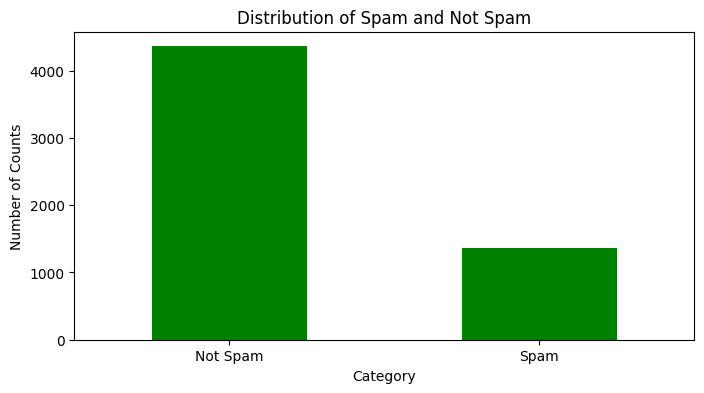

In [ ]:
mapping = {0: 'Not Spam', 1: 'Spam'}
plt.figure(figsize=(8, 4))
spam_map = df['Spam'].map(mapping).value_counts().plot(kind='bar', color='green', rot=0)

plt.title('Distribution of Spam and Not Spam')
plt.xlabel('Category')
plt.ylabel('Number of Counts')
plt.show()

In [ ]:
vectorizer = CountVectorizer() # convert text to word count vectors
X = vectorizer.fit_transform(df['Text'])
Y = df['Spam'].values  # get target values as array

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [ ]:
# create naive bayes model
mnb = MultinomialNB()
model = mnb.fit(X_train, Y_train) # train model on data

In [ ]:
# predictions
test_predictions = model.predict(X_test)

In [ ]:
# classification report
print(classification_report(Y_test, test_predictions, target_names=['Not Spam', 'Spam']))

              precision    recall  f1-score   support

    Not Spam       1.00      0.99      0.99       856
        Spam       0.97      0.99      0.98       290

    accuracy                           0.99      1146
   macro avg       0.99      0.99      0.99      1146
weighted avg       0.99      0.99      0.99      1146



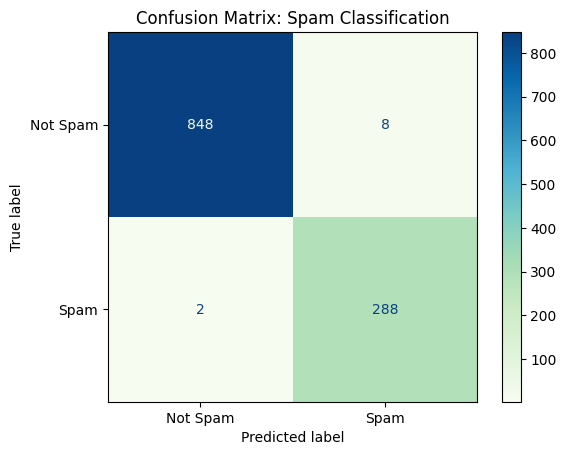

In [ ]:
# confusion matrix
cm = confusion_matrix(Y_test, test_predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Not Spam', 'Spam'])

# colormap title
disp.plot(cmap='GnBu')
plt.title('Confusion Matrix: Spam Classification')
plt.show()

In [ ]:
# model testing
sample_emails = ["Win a free trip to BoraBora!!!!!",
                 "The new MacStudios are available at iStyle",
                 "Regarding you Thesis proposal (Urgent)...",
                 "How to get rich with BitCoin fast!"]
transformed_emails = vectorizer.transform(sample_emails)
predictions = model.predict(transformed_emails)

for email, label in zip(sample_emails, predictions):
    print(f'Email: "{email}"\nPrediction: {["Not Spam", "Spam"][label]}\n')

Email: "Win a free trip to BoraBora!!!!!"
Prediction: Not Spam

Email: "The new MacStudios are available at iStyle"
Prediction: Not Spam

Email: "Regarding you Thesis proposal (Urgent)..."
Prediction: Not Spam

Email: "How to get rich with BitCoin fast!"
Prediction: Spam

